In [1]:
import sys
sys.path.append('/efs_ecco/ECCO/EMU/emu_userinterface_dir/')
import emu_plot_arg_py as ept

import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt


In [2]:
# Read Attribution Output from EMU for box 105E-110E 12S-8S

globals_dict = ept.emu_plot(run_name="/efs_ecco/sjarugul/Project_Datasets/emu_atrb_m_4_mask3d.105.0_115.0_-12.0_-8.0_10.0_0.0_1") #Attribution output for SSS
globals_dict1 = ept.emu_plot(run_name="/efs_ecco/sjarugul/Project_Datasets/emu_atrb_m_3_mask3d.105.0_115.0_-12.0_-8.0_10.0_0.0_1") #Attribution output for SST
globals_dict1

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/sjarugul/Project_Datasets/emu_atrb_m_4_mask3d.105.0_115.0_-12.0_-8.0_10.0_0.0_1

Reading /efs_ecco/sjarugul/Project_Datasets/emu_atrb_m_4_mask3d.105.0_115.0_-12.0_-8.0_10.0_0.0_1

Reading Attribution Tool output ... 
*********************************************
Read OBJF and contributions to it from different controls
   atrb: temporal anomaly 
   atrb_mn: reference time-mean 
   fctrl: names of atrb/atrb_mn variables 
from file /efs_ecco/sjarugul/Project_Datasets/emu_atrb_m_4_mask3d.105.0_115.0_-12.0_-8.0_10.0_0.0_1/output/atrb.out_312

*********************************************
Read variable 
   atrb_hr: sample time (hours from 1/1/1992 12Z)
from file /efs_ecco/sjarugul/Project_Datasets/emu_atrb_m_4_mask3d.105.0_115.0_-12.0_-8.0_10.0_0.0_1/output/atrb.step_312


***********************
EMU varia

{'return_vars': {'time_values': array([1992.08356164, 1992.1630137 , 1992.24794521, 1992.33013699,
         1992.41506849, 1992.49726027, 1992.58219178, 1992.66712329,
         1992.74931507, 1992.83424658, 1992.91643836, 1993.00136986,
         1993.08630137, 1993.1630137 , 1993.24794521, 1993.33013699,
         1993.41506849, 1993.49726027, 1993.58219178, 1993.66712329,
         1993.74931507, 1993.83424658, 1993.91643836, 1994.00136986,
         1994.08630137, 1994.1630137 , 1994.24794521, 1994.33013699,
         1994.41506849, 1994.49726027, 1994.58219178, 1994.66712329,
         1994.74931507, 1994.83424658, 1994.91643836, 1995.00136986,
         1995.08630137, 1995.1630137 , 1995.24794521, 1995.33013699,
         1995.41506849, 1995.49726027, 1995.58219178, 1995.66712329,
         1995.74931507, 1995.83424658, 1995.91643836, 1996.00136986,
         1996.08630137, 1996.16575342, 1996.25068493, 1996.33287671,
         1996.41780822, 1996.5       , 1996.58493151, 1996.66986301,
    

In [3]:
# Extract return dictionary
return_vars_dict = globals_dict.get('return_vars')
return_vars_dict1 = globals_dict1.get('return_vars')

In [4]:
#Get SSS attribution variables

sfld_all = return_vars_dict['variable'] 
print(return_vars_dict['ctrl_name'])
sfld_all.shape

['lhs', 'wind', 'htflx', 'fwflx', 'sflx', 'pload', 'ic']


(7, 312)

In [5]:
#Get SST attribution variables

tfld_all = return_vars_dict1['variable'] 
print(return_vars_dict1['ctrl_name'])
tfld_all.shape

['lhs', 'wind', 'htflx', 'fwflx', 'sflx', 'pload', 'ic']


(7, 312)

In [6]:
# SSS Attribution - convert to xarray 

time = pd.date_range(start='1992-01-01', end='2017-12-01', freq='MS')

lhs = sfld_all[0,:]
wind = sfld_all[1,:]
htflx = sfld_all[2,:]
fwflx = sfld_all[3,:]
sflx = sfld_all[4,:]
pload = sfld_all[5,:]
ic = sfld_all[6,:]

sattr = xr.Dataset(
    {
        'lhs': (['time'], lhs),
        'wind': (['time'], wind),
        'htflx': (['time'], htflx),
        'fwflx': (['time'], fwflx),
        'sflx': (['time'], sflx),
        'pload': (['time'], pload),
        'ic': (['time'], ic),      
    },
    coords={'time': time}
)

sattr



<xarray.Dataset> Size: 11kB
Dimensions:  (time: 312)
Coordinates:
  * time     (time) datetime64[ns] 2kB 1992-01-01 1992-02-01 ... 2017-12-01
Data variables:
    lhs      (time) >f4 1kB 0.005504 -0.2364 -0.5057 ... 0.1562 0.06015 -0.1737
    wind     (time) >f4 1kB -0.2647 -0.1648 -0.1631 ... -0.1065 -0.091 -0.05235
    htflx    (time) >f4 1kB 0.01235 0.01656 0.006949 ... 0.008263 -0.05468
    fwflx    (time) >f4 1kB -0.05022 -0.2403 -0.3124 ... 0.1996 0.1243 -0.1481
    sflx     (time) >f4 1kB 1.81e-05 1.498e-05 ... -7.776e-05 -4.189e-05
    pload    (time) >f4 1kB -0.0003304 -0.001502 ... 0.0002815 0.0002671
    ic       (time) >f4 1kB 0.08138 0.07132 -0.03293 ... 0.009454 0.008036

In [7]:
# SST Attribution - convert to xarray 

time = pd.date_range(start='1992-01-01', end='2017-12-01', freq='MS')

lhs = tfld_all[0,:]
wind = tfld_all[1,:]
htflx = tfld_all[2,:]
fwflx = tfld_all[3,:]
sflx = tfld_all[4,:]
pload = tfld_all[5,:]
ic = tfld_all[6,:]

tattr = xr.Dataset(
    {
        'lhs': (['time'], lhs),
        'wind': (['time'], wind),
        'htflx': (['time'], htflx),
        'fwflx': (['time'], fwflx),
        'sflx': (['time'], sflx),
        'pload': (['time'], pload),
        'ic': (['time'], ic),      
    },
    coords={'time': time}
)

tattr



<xarray.Dataset> Size: 11kB
Dimensions:  (time: 312)
Coordinates:
  * time     (time) datetime64[ns] 2kB 1992-01-01 1992-02-01 ... 2017-12-01
Data variables:
    lhs      (time) >f4 1kB 1.002 1.148 1.439 1.325 ... -0.5094 0.5531 0.526
    wind     (time) >f4 1kB 1.218 1.282 1.358 1.325 ... -1.307 -1.064 -1.158
    htflx    (time) >f4 1kB 0.46 0.7918 1.279 1.354 ... 0.4455 1.274 0.9207
    fwflx    (time) >f4 1kB -0.03832 -0.1982 -0.2658 ... 0.2233 0.1914 -0.06379
    sflx     (time) >f4 1kB 7.749e-06 7.987e-06 ... -0.0003409 -0.00027
    pload    (time) >f4 1kB 0.002246 0.001984 0.00206 ... 0.001293 0.0004779
    ic       (time) >f4 1kB 0.8719 0.875 0.6948 ... 0.04533 0.04665 0.05171

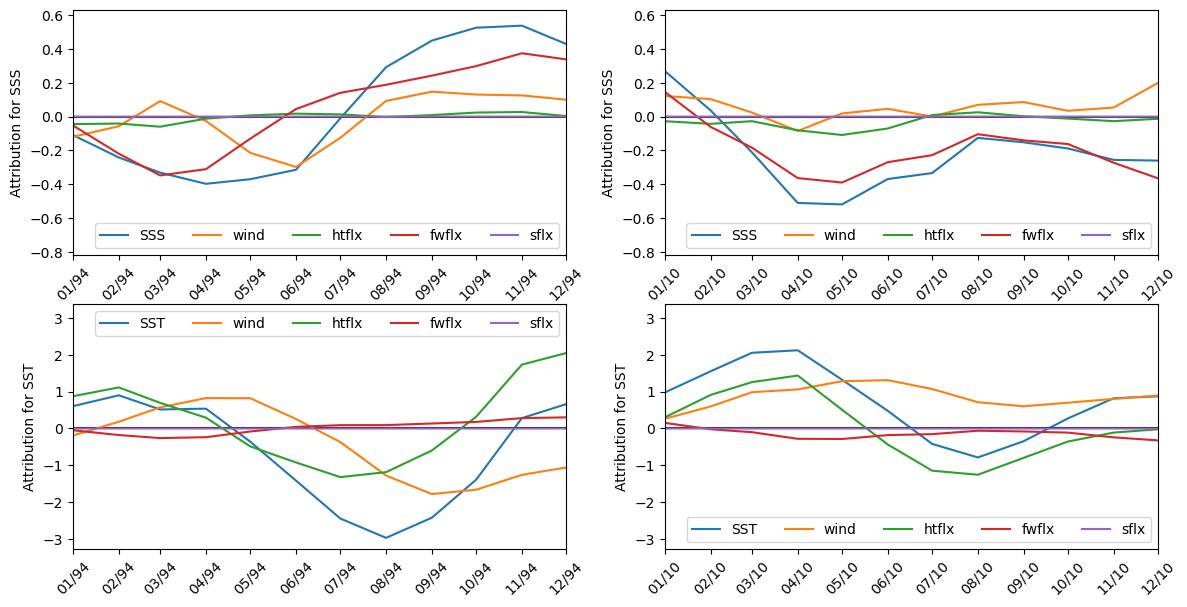

In [8]:
# Plot Attributions for SST and SSS 

fig,ax = plt.subplots(2,2,figsize=(14,7))

ax1=ax[0,0]

ax1.plot(sattr.time,sattr.lhs,label='SSS')
ax1.plot(sattr.time,sattr.lhs*0,'-k')

ax1.plot(sattr.time,sattr.wind,label='wind')
ax1.plot(sattr.time,sattr.htflx,label='htflx')
ax1.plot(sattr.time,sattr.fwflx,label='fwflx')
ax1.plot(sattr.time,sattr.sflx,label='sflx')

ax1.set_ylabel('Attribution for SSS')

ax1.legend(loc="lower right",ncol=5)

ax1.set_xlim([pd.to_datetime('1994-01-01'), pd.to_datetime('1994-12-01')])
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m/%y'))
ax1.tick_params(axis='x', rotation=45) 

ax1=ax[0,1]

ax1.plot(sattr.time,sattr.lhs,label='SSS')
ax1.plot(sattr.time,sattr.lhs*0,'-k')

ax1.plot(sattr.time,sattr.wind,label='wind')
ax1.plot(sattr.time,sattr.htflx,label='htflx')
ax1.plot(sattr.time,sattr.fwflx,label='fwflx')
ax1.plot(sattr.time,sattr.sflx,label='sflx')

ax1.set_ylabel('Attribution for SSS')

ax1.legend(loc="lower right",ncol=5)

ax1.set_xlim([pd.to_datetime('2010-01-01'), pd.to_datetime('2010-12-01')])
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m/%y'))
ax1.tick_params(axis='x', rotation=45) 

ax1=ax[1,0]

ax1.plot(tattr.time,tattr.lhs,label='SST')
ax1.plot(tattr.time,tattr.lhs*0,'-k')

ax1.plot(tattr.time,tattr.wind,label='wind')
ax1.plot(tattr.time,tattr.htflx,label='htflx')
ax1.plot(tattr.time,tattr.fwflx,label='fwflx')
ax1.plot(tattr.time,tattr.sflx,label='sflx')

ax1.set_ylabel('Attribution for SST')

ax1.legend(loc="upper right",ncol=5)

ax1.set_xlim([pd.to_datetime('1994-01-01'), pd.to_datetime('1994-12-01')])
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m/%y'))
ax1.tick_params(axis='x', rotation=45)

ax1=ax[1,1]

ax1.plot(tattr.time,tattr.lhs,label='SST')
ax1.plot(tattr.time,tattr.lhs*0,'-k')

ax1.plot(tattr.time,tattr.wind,label='wind')
ax1.plot(tattr.time,tattr.htflx,label='htflx')
ax1.plot(tattr.time,tattr.fwflx,label='fwflx')
ax1.plot(tattr.time,tattr.sflx,label='sflx')

ax1.set_ylabel('Attribution for SST')

ax1.legend(loc="lower right",ncol=5)

ax1.set_xlim([pd.to_datetime('2010-01-01'), pd.to_datetime('2010-12-01')])
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m/%y'))
ax1.tick_params(axis='x', rotation=45)

#plt.savefig('/efs_ecco/sjarugul/Figures/EMU_SSS_SST_Attribution_Java_1994_2010.png', bbox_inches='tight',dpi=300)

